## Neural Networks Homework5 - Mustafa Nazlıer - 15050111035

In [1]:
# check version
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Fashion-MNIST

See <a href="https://www.tensorflow.org/tutorials/keras/classification">Basic classification: Classify images of clothing</a>

Load and prepare dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train, X_valid = train_images[:40000], train_images[40000:]
y_train, y_valid = train_labels[:40000], train_labels[40000:]

In [5]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [6]:
print('Train      : ', X_train.shape)
print('Validation : ', X_valid.shape)
print('Test       : ', X_test.shape)

Train      :  (40000, 28, 28)
Validation :  (20000, 28, 28)
Test       :  (10000, 28, 28)


Lets visualise data

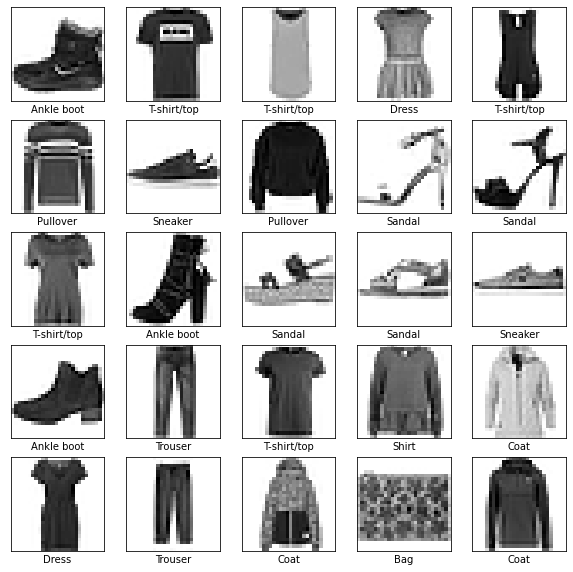

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Simple Sequential Model V1

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

Lets start with a traditional network: single hidden layer, sigmoid activation functions, and SGD as optimizer

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [10]:
numberOfEpochs = 25

In [11]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='sgd',
               metrics=['accuracy'])

In [12]:
h = model1.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 1s 984us/step - loss: 2.0176 - accuracy: 0.4018 - val_loss: 1.2817 - val_accuracy: 0.7116
Epoch 2/25
1250/1250 [==============================] - 1s 644us/step - loss: 1.1724 - accuracy: 0.7080 - val_loss: 0.9339 - val_accuracy: 0.7375
Epoch 3/25
1250/1250 [==============================] - 1s 556us/step - loss: 0.8954 - accuracy: 0.7410 - val_loss: 0.7924 - val_accuracy: 0.7560
Epoch 4/25
1250/1250 [==============================] - 1s 606us/step - loss: 0.7720 - accuracy: 0.7606 - val_loss: 0.7139 - val_accuracy: 0.7695
Epoch 5/25
1250/1250 [==============================] - 1s 602us/step - loss: 0.7075 - accuracy: 0.7699 - val_loss: 0.6625 - val_accuracy: 0.7846
Epoch 6/25
1250/1250 [==============================] - 1s 546us/step - loss: 0.6555 - accuracy: 0.7856 - val_loss: 0.6240 - val_accuracy: 0.7933
Epoch 7/25
1250/1250 [==============================] - 1s 632us/step - loss: 0.6220 - accuracy: 0.7943 - val_loss: 0.5952 -

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Lets observe the performance of the network:

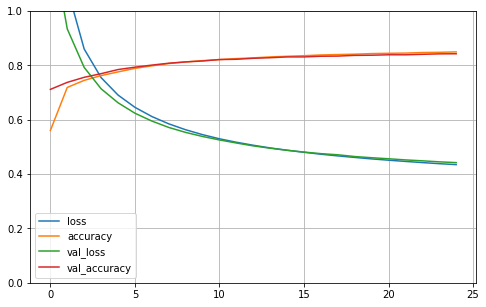

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [16]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [17]:
def show_example_prediction(i, predictions):
  print('Probability of output neurons for first test data:\n', predictions[i])
  print()

  print('Neuron having maximum probability (prediction) is ', np.argmax(predictions[i]), ' and corresponding label is ', class_names[np.argmax(predictions[i])])
  print('True label index ', y_test[i], ' and corresponding label is ', class_names[y_test[i]])
  print()

  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  y_test)
  plt.show()

In [18]:
def show_15_predictions(predictions):
    # Plot the first X test images, their predicted labels, and the true labels.
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], y_test, X_test)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], y_test)
    plt.tight_layout()
    plt.show()    

Probability of output neurons for first test data:
 [-3.133151  -2.4734128 -2.9315174 -2.36742   -2.03008    3.4810958
 -1.7049961  4.2067337  1.0737226  4.858796 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



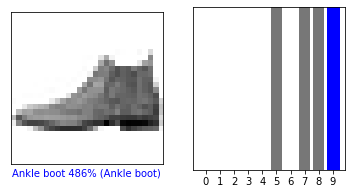

In [19]:
predictions = model1.predict(X_test)

show_example_prediction(0, predictions)

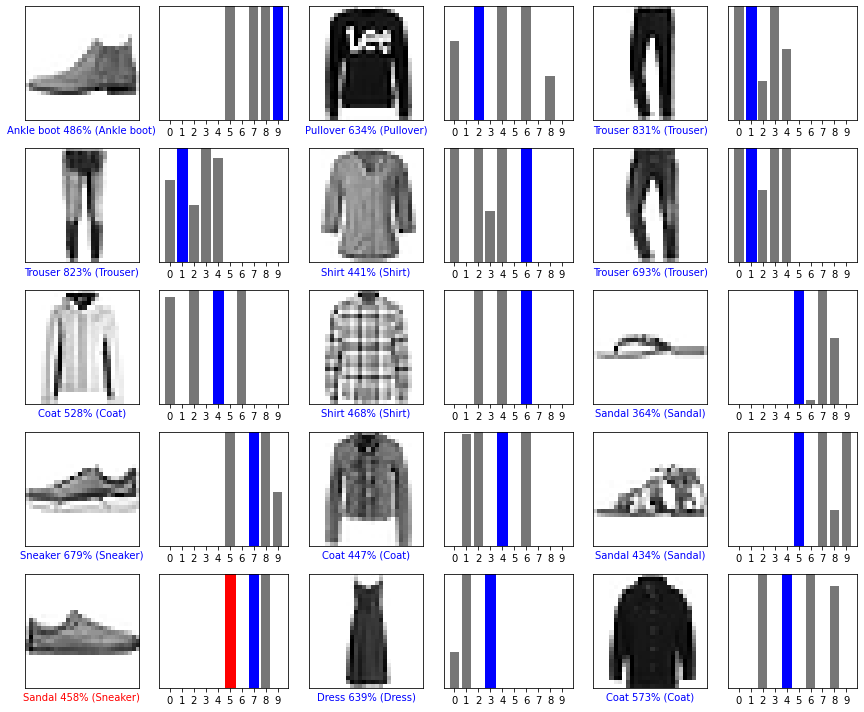

In [20]:
show_15_predictions(predictions)

In [21]:
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8335000276565552


Please write your comments for the model v1

<b>Student comments </b>: 

The simple squential model v1 is a solid example of a undemanding Neural network model/architecture that we have seen in the previous weeks, it uses sigmoid activation function in its single hidden layer. From the predictions, one can see that it performed mediocre with the given MNIST dataset. As we have learned from the lecture, this mediocre performance is caused by these variables; 

-Having a simple architecture with only one hidden layer
-Using sigmoid as activation function that we now, other activation funcs like ReLu can perform better with the given data
-Using Stochastic gradient descent as optimizer, can have a vast effect on the outcome, this does not mean SGD is bad, but with  the given data other may perform better

# Simple Sequential Model V2

In [22]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [23]:
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [24]:
h = model2.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 1s 730us/step - loss: 0.8059 - accuracy: 0.7272 - val_loss: 0.4566 - val_accuracy: 0.8393
Epoch 2/25
1250/1250 [==============================] - 1s 617us/step - loss: 0.4545 - accuracy: 0.8383 - val_loss: 0.4813 - val_accuracy: 0.8347
Epoch 3/25
1250/1250 [==============================] - 1s 634us/step - loss: 0.4030 - accuracy: 0.8574 - val_loss: 0.4112 - val_accuracy: 0.8559
Epoch 4/25
1250/1250 [==============================] - 1s 641us/step - loss: 0.3807 - accuracy: 0.8679 - val_loss: 0.3779 - val_accuracy: 0.8656
Epoch 5/25
1250/1250 [==============================] - 1s 661us/step - loss: 0.3528 - accuracy: 0.8759 - val_loss: 0.3746 - val_accuracy: 0.8676
Epoch 6/25
1250/1250 [==============================] - 1s 602us/step - loss: 0.3434 - accuracy: 0.8767 - val_loss: 0.3794 - val_accuracy: 0.8665
Epoch 7/25
1250/1250 [==============================] - 1s 679us/step - loss: 0.3290 - accuracy: 0.8812 - val_loss: 0.3666 -

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


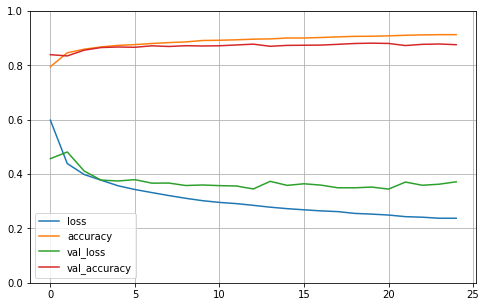

In [26]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [ -7.7023306 -22.422457   -4.052687  -11.219806    1.150013    2.3953846
  -3.93353     7.5488634  -0.1312123  11.20872  ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



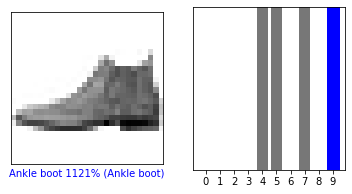

In [27]:
predictions = model2.predict(X_test)

show_example_prediction(0, predictions)

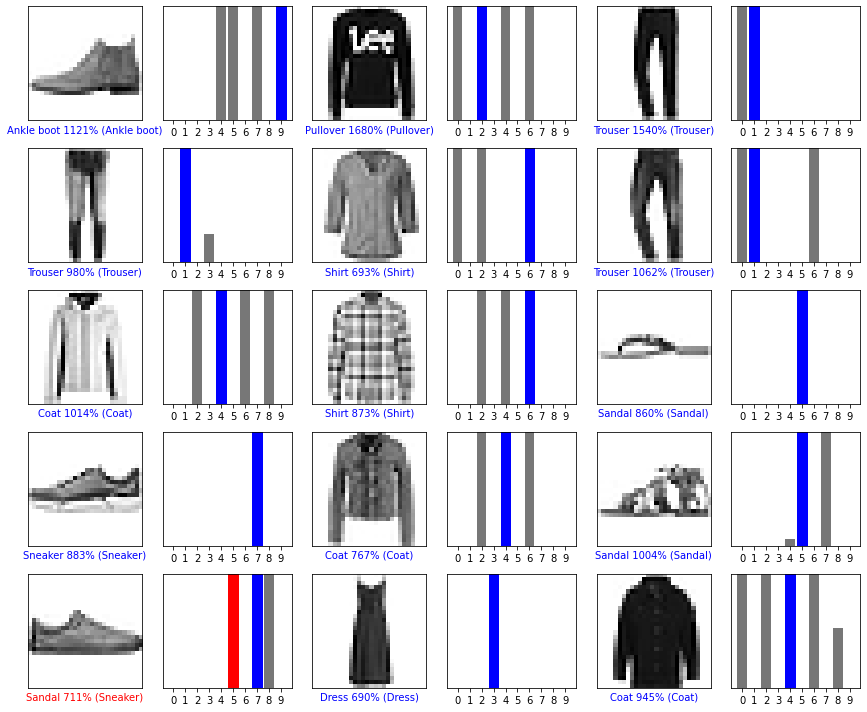

In [28]:
show_15_predictions(predictions)

In [29]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8676000237464905


Please write your comments for the model v2

<b>Student comments </b>:

The simple squential model v2 uses the same exact architecture with the sequential v1 but with a different activation function in its only hidden layer (ReLu instead of Sigmoid) and a different optimizer (Adaptive Moment Estimation instead of Stochastic gradient descent). From the test accuracy, we can observe that it performed little better from the sequential v1. I have to add that  relative to an average sized Neural Network architecture, both v1 and v2 performed fairly well considering their simplicity. Other than that, we may figure out that with these really simple models, we should not expect high levels of accuracy(%95+) when dealing with the MNIST dataset. We can still have/try

-Different activation functions
-Different optimizers 
-More than one hidden layer


# Simple Sequential Model V3

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [31]:
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='Adam',              
               metrics=['accuracy'])

In [32]:
h = model3.fit(X_train, y_train, epochs=numberOfEpochs, validation_data=(X_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 1s 821us/step - loss: 0.7681 - accuracy: 0.7313 - val_loss: 0.4590 - val_accuracy: 0.8395
Epoch 2/25
1250/1250 [==============================] - 1s 695us/step - loss: 0.4224 - accuracy: 0.8500 - val_loss: 0.4277 - val_accuracy: 0.8505
Epoch 3/25
1250/1250 [==============================] - 1s 727us/step - loss: 0.3785 - accuracy: 0.8630 - val_loss: 0.3764 - val_accuracy: 0.8649
Epoch 4/25
1250/1250 [==============================] - 1s 744us/step - loss: 0.3493 - accuracy: 0.8722 - val_loss: 0.3535 - val_accuracy: 0.8731
Epoch 5/25
1250/1250 [==============================] - 1s 763us/step - loss: 0.3158 - accuracy: 0.8830 - val_loss: 0.3637 - val_accuracy: 0.8680
Epoch 6/25
1250/1250 [==============================] - 1s 791us/step - loss: 0.3091 - accuracy: 0.8837 - val_loss: 0.3435 - val_accuracy: 0.8766
Epoch 7/25
1250/1250 [==============================] - 1s 694us/step - loss: 0.2940 - accuracy: 0.8906 - val_loss: 0.3370 -

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


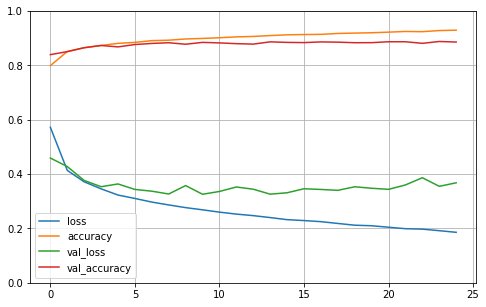

In [34]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [ -8.574199  -13.29706   -12.2827425 -14.898018  -14.160295   -3.748522
 -12.447667    1.8347362 -16.924934    8.103834 ]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



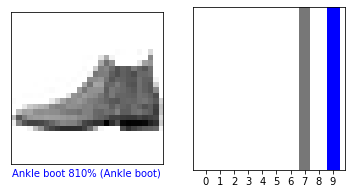

In [35]:
predictions = model3.predict(X_test)

show_example_prediction(0, predictions)

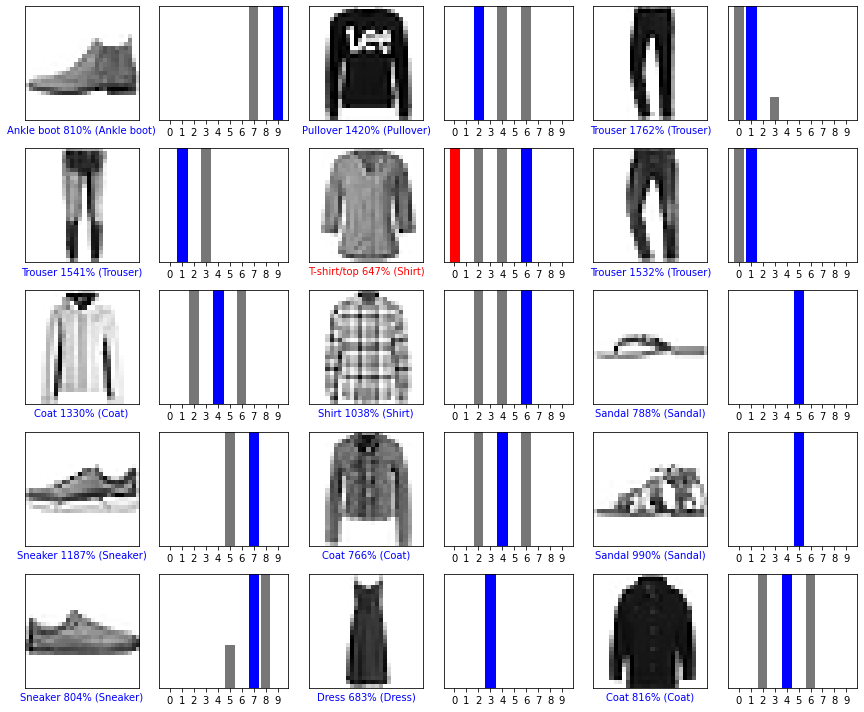

In [36]:
show_15_predictions(predictions)

In [37]:
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)



Test accuracy: 0.8783000111579895


Please write your comments for the model v3

<b>Student comments </b>:

The simple sequential model v3 uses the same activation function (ReLu) and optimizer (Adam) with the sequential v2, but this time one more hidden layer also with the ReLu activation func is added to the network model. Performancewise, it is similar with the model v2. It started to make sense that why we need to the convolutional neural networks when dealing with the images. I also believe that we can achieve better results with using models like v1,v2 and v3 but we may need to optimize them better or have many more number of layers


# CNN Model

In [38]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [39]:
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, Dropout 

Create CNN_model, compile it, train it, and test it. Finally write comments on your CNN model.

In [40]:

CNN_model = Sequential([
        Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
        Conv2D(filters=48 , kernel_size=5, activation='relu', padding='same'),
        Conv2D(filters=64 , kernel_size=5, activation='relu', padding='same'),
        MaxPool2D(pool_size=3, strides=1),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(10, activation='softmax')])




   
    

In [41]:
CNN_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.035), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [42]:
import timeit

%time h = CNN_model.fit(X_train, y_train , epochs=15, verbose=1 , validation_data=(X_valid, y_valid) )


Epoch 1/15
1250/1250 [==============================] - 163s 130ms/step - loss: 0.8475 - accuracy: 0.6944 - val_loss: 0.3614 - val_accuracy: 0.8672
Epoch 2/15
1250/1250 [==============================] - 174s 140ms/step - loss: 0.3914 - accuracy: 0.8608 - val_loss: 0.3207 - val_accuracy: 0.8784
Epoch 3/15
1250/1250 [==============================] - 166s 133ms/step - loss: 0.3143 - accuracy: 0.8868 - val_loss: 0.2685 - val_accuracy: 0.9005
Epoch 4/15
1250/1250 [==============================] - 157s 126ms/step - loss: 0.2699 - accuracy: 0.9002 - val_loss: 0.2544 - val_accuracy: 0.9051
Epoch 5/15
1250/1250 [==============================] - 163s 130ms/step - loss: 0.2452 - accuracy: 0.9101 - val_loss: 0.2361 - val_accuracy: 0.9130
Epoch 6/15
1250/1250 [==============================] - 163s 130ms/step - loss: 0.2142 - accuracy: 0.9196 - val_loss: 0.2385 - val_accuracy: 0.9142
Epoch 7/15
1250/1250 [==============================] - 155s 124ms/step - loss: 0.1965 - accuracy: 0.9269 - val_

In [43]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 28, 28, 32)          832       
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 28, 28, 48)          38448     
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 28, 28, 64)          76864     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 26, 26, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (32, 43264)               0         
_________________________________________________________________
dense_7 (Dense)              (32, 128)                 5537920   
_________________________________________________________________
dropout (Dropout)            (32, 128)                

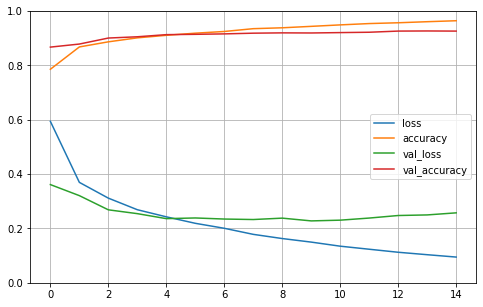

In [44]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Probability of output neurons for first test data:
 [1.7917816e-14 1.4033998e-15 2.2273026e-14 4.3949656e-14 3.4509033e-15
 9.3800814e-11 1.0928568e-14 3.9237937e-09 9.0435316e-14 1.0000000e+00]

Neuron having maximum probability (prediction) is  9  and corresponding label is  Ankle boot
True label index  9  and corresponding label is  Ankle boot



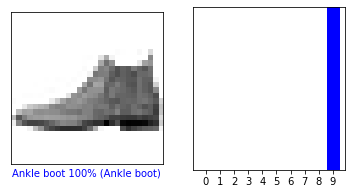

In [45]:
predictions = CNN_model.predict(X_test)

show_example_prediction(0, predictions)

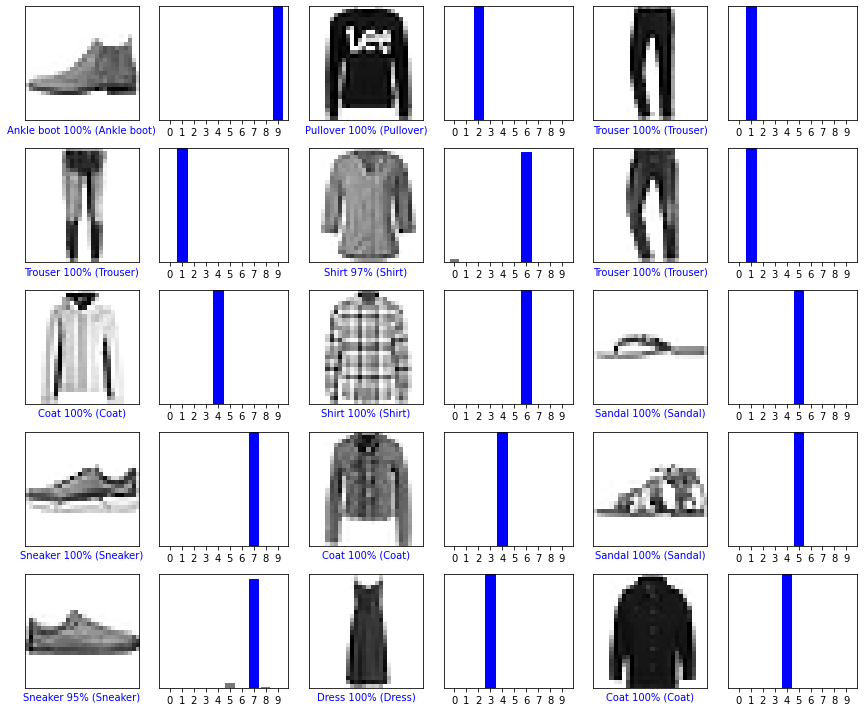

In [46]:
show_15_predictions(predictions)

In [47]:
test_loss, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9240999817848206


Please write your comments for the CNN Model

<b>Student comments </b>:

For to achieve an acceptable accuracy level, Firstly, I have created random models with a lot of trial and error. During my trial and errors, I have seen that the best combination of activation functions for dealing with the MNIST is ReLu with the Softmax as output because I have tried some other combinations but the ReLu with the Softmax as output was the most reliable one considering the runtime and the accuracy levels. Then I realized that without doing some research for the homework and just by trying different combinations, it is kinda impossible to retain a good level of accuracy. I did some academic reading and most of the solutions suggested were either too complex or included BatchNormalization. I did achieve %90 accuracy by modifying the LeNet5 but I have tried to aim for more. To balance the execution time, accuracy and the complexity of the network,  each particular variable that I have experimented with are ;  overall network complexity, stride and pool_size, filter size , learning rate, pooling placement.
After doing research about overfitting and how to not overfit, I limited my epoch number with 15, also I have added some Dropout to my network. There are different kind of opinions on the internet about the placement of Dropout layers, some say that adding one after each Convolutional layer is optimal, some uses only before the flattening. To sum all, I have mixed all the things that I learned and achieved %92 accuracy. It could be better but I couldn't be able to optimize it and make it better. 